In [1]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains(
    'bushel', case=True, regex=True)]

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']

pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame(
    {
        'Month': month,
        'Package': pumpkins['Package'],
        'Low Price': pumpkins['Low Price'],
        'High Price': pumpkins['High Price'],
        'Price': price,
    })

new_pumpkins.loc[new_pumpkins['Package'].str.contains(
    '1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains(
    '1/2'), 'Price'] = price/(1/2)


/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<AxesSubplot:xlabel='Month'>

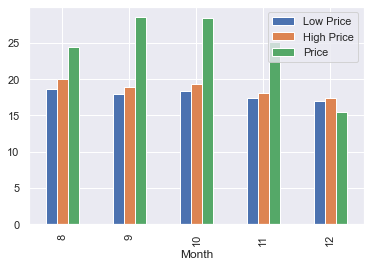

In [5]:
new_pumpkins.groupby(['Month']).mean().plot(kind='bar')

In [10]:
import seaborn as sns

sns.set_theme()

sns_pumpkins = new_pumpkins.groupby(['Month']).mean()
sns.relplot(data=sns_pumpkins, kind='line')


ValueError: Plot kind bar not recognized